<a href="https://colab.research.google.com/github/iomkarsurve/Doge-Coin-Prediction/blob/main/Doge_Coin_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from fbprophet import Prophet

In [2]:
df = pd.read_csv('DOGE-USD.csv')

In [3]:
df = df[["Date","Close"]]

In [4]:
df.columns = ["ds","y"]

In [5]:
print(df)

             ds         y
0    2020-10-17  0.002581
1    2020-10-18  0.002586
2    2020-10-19  0.002590
3    2020-10-20  0.002601
4    2020-10-21  0.002630
..          ...       ...
361  2021-10-13  0.232572
362  2021-10-14  0.232273
363  2021-10-15  0.233782
364  2021-10-16       NaN
365  2021-10-17  0.236768

[366 rows x 2 columns]


In [6]:
prophet= Prophet( yearly_seasonality=True,daily_seasonality=True)

In [7]:
prophet.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.


In [8]:
future = prophet.make_future_dataframe(periods=365)

In [9]:
print(future)

            ds
0   2020-10-17
1   2020-10-18
2   2020-10-19
3   2020-10-20
4   2020-10-21
..         ...
726 2022-10-13
727 2022-10-14
728 2022-10-15
729 2022-10-16
730 2022-10-17

[731 rows x 1 columns]


In [10]:
forecast = prophet.predict(future)

In [11]:
forecast[["ds","yhat","yhat_lower","yhat_upper"]].head(400)

,ds,yhat,yhat_lower,yhat_upper
0,2020-10-17,-0.003480,-0.048875,0.040701
1,2020-10-18,-0.003620,-0.046373,0.039369
2,2020-10-19,-0.005095,-0.050365,0.040033
3,2020-10-20,-0.005275,-0.047089,0.036397
4,2020-10-21,-0.002822,-0.046954,0.042754
...,...,...,...,...
395,2021-11-16,0.248647,0.205899,0.291816
396,2021-11-17,0.249899,0.205558,0.292797
397,2021-11-18,0.249582,0.205365,0.293243
398,2021-11-19,0.255248,0.209205,0.298894


In [12]:
from fbprophet.plot import plot

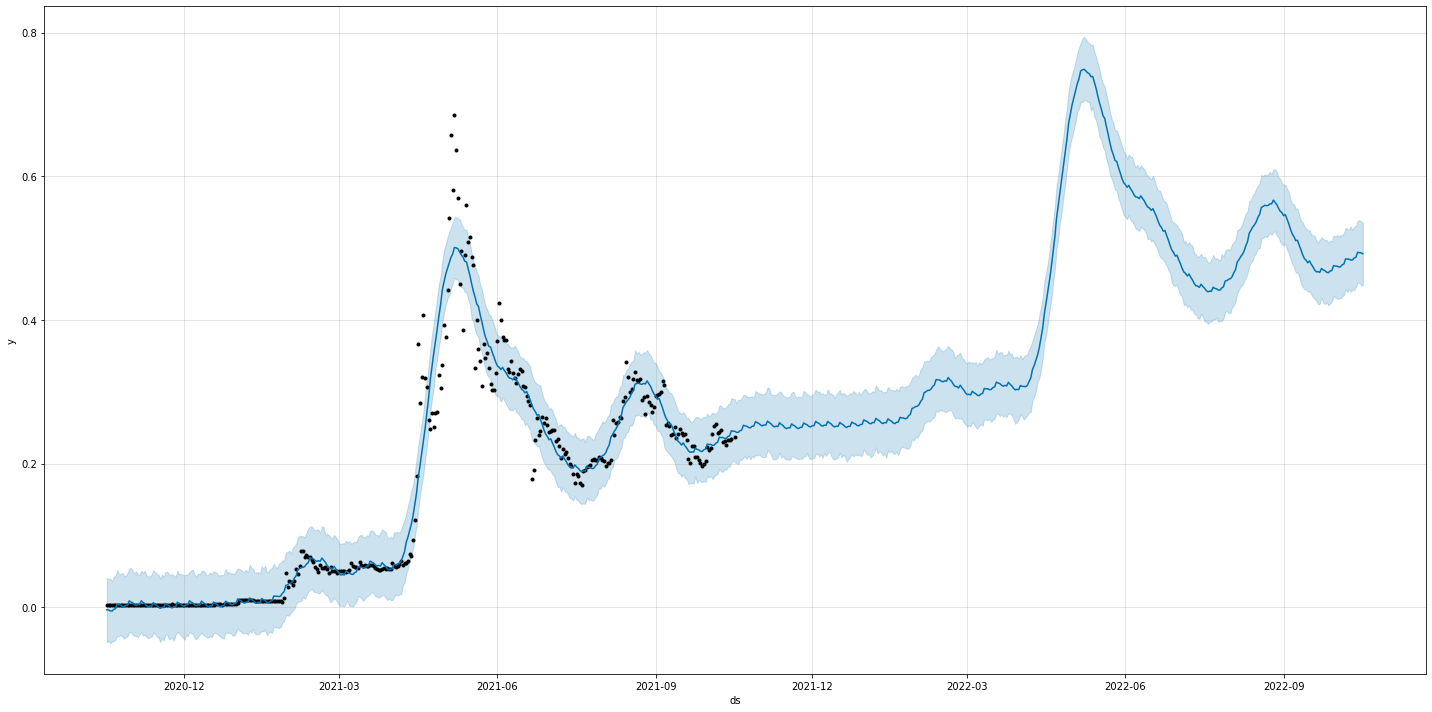

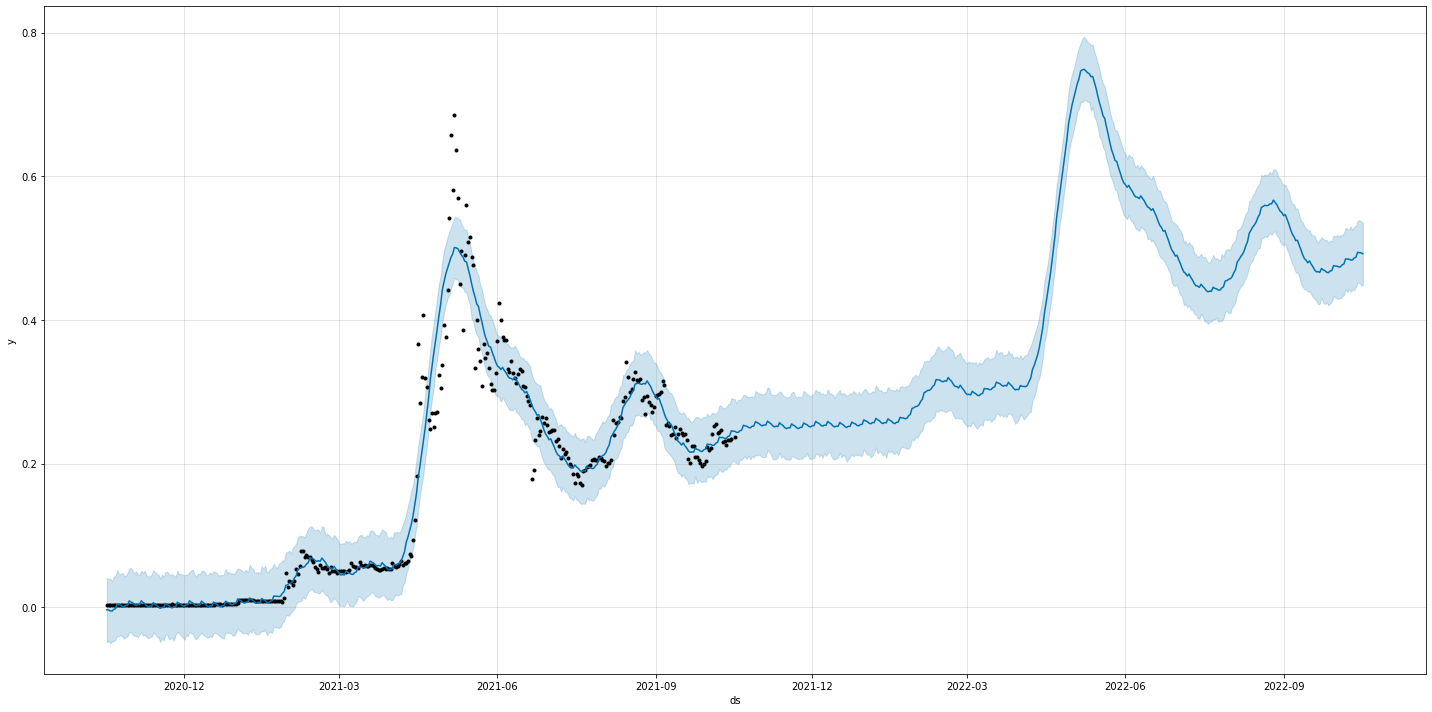

In [13]:
prophet.plot(forecast,figsize=(20,10))